# **EDA on Health Insurance Coverage in America**

Created By:

Sachin Kumar Kar

MBA 1st year

KJ Somaiya Institute of Management

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visual style
sns.set_theme(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Load dataset
df = pd.read_csv('HealthInsurance.csv')
df.drop(columns=['rownames'], inplace=True)

print('Dataset loaded successfully!')
print(f'Shape: {df.shape}')
df.head()

Dataset loaded successfully!
Shape: (8802, 11)


,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [2]:
# Data types and basic info
print('=== Dataset Info ===')
df.info()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   health     8802 non-null   object
 1   age        8802 non-null   int64 
 2   limit      8802 non-null   object
 3   gender     8802 non-null   object
 4   insurance  8802 non-null   object
 5   married    8802 non-null   object
 6   selfemp    8802 non-null   object
 7   family     8802 non-null   int64 
 8   region     8802 non-null   object
 9   ethnicity  8802 non-null   object
 10  education  8802 non-null   object
dtypes: int64(2), object(9)
memory usage: 756.6+ KB


In [3]:
# Missing values
print('=== Missing Values ===')
missing = df.isnull().sum()
print(missing)
print(f'\nTotal missing values: {missing.sum()}')

=== Missing Values ===
health       0
age          0
limit        0
gender       0
insurance    0
married      0
selfemp      0
family       0
region       0
ethnicity    0
education    0
dtype: int64

Total missing values: 0


In [4]:
# Duplicate rows
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 1411


In [5]:
# Descriptive statistics
print('=== Descriptive Statistics ===')
df.describe(include='all')

=== Descriptive Statistics ===


,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
count,8802,8802.000000,8802,8802,8802,8802,8802,8802.000000,8802,8802,8802
unique,2,NaN,2,2,2,2,2,NaN,4,3,7
top,yes,NaN,no,male,yes,yes,no,NaN,south,cauc,highschool
freq,8173,NaN,7571,4633,7052,5433,7731,NaN,3075,7354,4434
mean,NaN,38.936833,NaN,NaN,NaN,NaN,NaN,3.093501,NaN,NaN,NaN
std,NaN,11.110823,NaN,NaN,NaN,NaN,NaN,1.559633,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [6]:
# Value counts for all categorical columns
categorical_cols = ['health', 'limit', 'gender', 'insurance', 'married', 'selfemp', 'region', 'ethnicity', 'education']

for col in categorical_cols:
    print(f'\n--- {col.upper()} ---')
    print(df[col].value_counts())
    print(f'Unique values: {df[col].nunique()}')


--- HEALTH ---
health
yes    8173
no      629
Name: count, dtype: int64
Unique values: 2

--- LIMIT ---
limit
no     7571
yes    1231
Name: count, dtype: int64
Unique values: 2

--- GENDER ---
gender
male      4633
female    4169
Name: count, dtype: int64
Unique values: 2

--- INSURANCE ---
insurance
yes    7052
no     1750
Name: count, dtype: int64
Unique values: 2

--- MARRIED ---
married
yes    5433
no     3369
Name: count, dtype: int64
Unique values: 2

--- SELFEMP ---
selfemp
no     7731
yes    1071
Name: count, dtype: int64
Unique values: 2

--- REGION ---
region
south        3075
midwest      2023
west         2022
northeast    1682
Name: count, dtype: int64
Unique values: 4

--- ETHNICITY ---
ethnicity
cauc     7354
afam     1083
other     365
Name: count, dtype: int64
Unique values: 3

--- EDUCATION ---
education
highschool    4434
bachelor      1549
none          1119
other          667
master         524
ged            374
phd            135
Name: count, dtype: int64
Unique

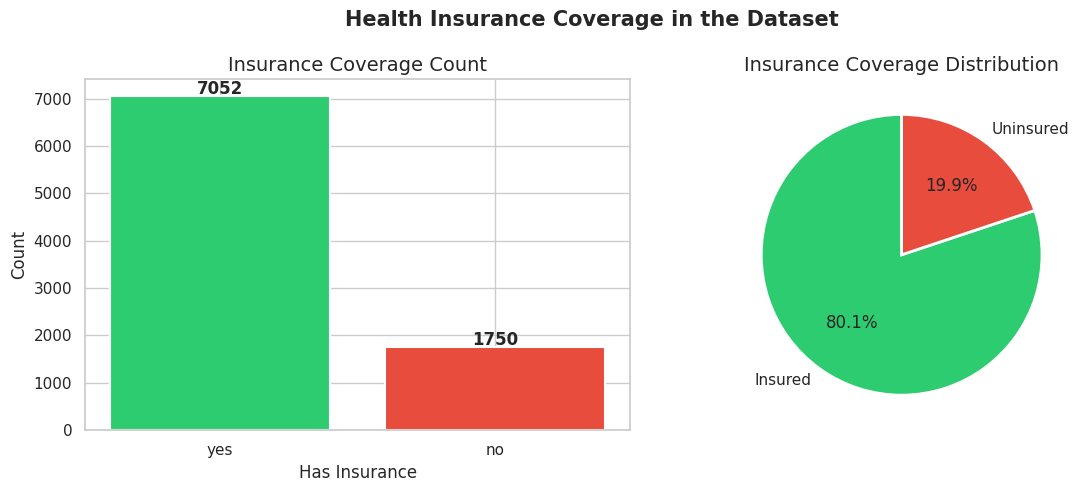

Insured: 7052 (80.1%)
Uninsured: 1750 (19.9%)


In [7]:
# Insurance coverage distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

insurance_counts = df['insurance'].value_counts()
colors = ['#2ecc71', '#e74c3c']

# Bar chart
axes[0].bar(insurance_counts.index, insurance_counts.values, color=colors, edgecolor='white', linewidth=1.5)
axes[0].set_title('Insurance Coverage Count')
axes[0].set_xlabel('Has Insurance')
axes[0].set_ylabel('Count')
for i, v in enumerate(insurance_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(insurance_counts.values, labels=['Insured', 'Uninsured'], autopct='%1.1f%%',
            colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Insurance Coverage Distribution')

plt.suptitle('Health Insurance Coverage in the Dataset', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print(f"Insured: {insurance_counts['yes']} ({insurance_counts['yes']/len(df)*100:.1f}%)")
print(f"Uninsured: {insurance_counts['no']} ({insurance_counts['no']/len(df)*100:.1f}%)")

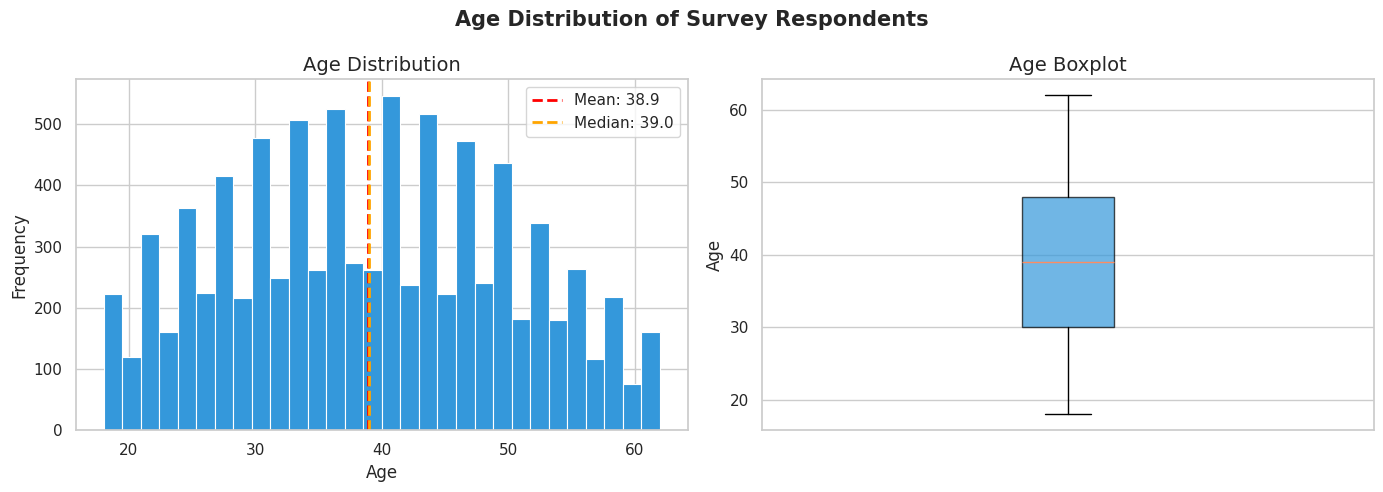

count    8802.000000
mean       38.936833
std        11.110823
min        18.000000
25%        30.000000
50%        39.000000
75%        48.000000
max        62.000000
Name: age, dtype: float64


In [8]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['age'], bins=30, color='#3498db', edgecolor='white', linewidth=0.8)
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['age'].mean():.1f}")
axes[0].axvline(df['age'].median(), color='orange', linestyle='--', linewidth=2, label=f"Median: {df['age'].median():.1f}")
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].boxplot(df['age'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[1].set_title('Age Boxplot')
axes[1].set_ylabel('Age')
axes[1].set_xticks([])

plt.suptitle('Age Distribution of Survey Respondents', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print(df['age'].describe())

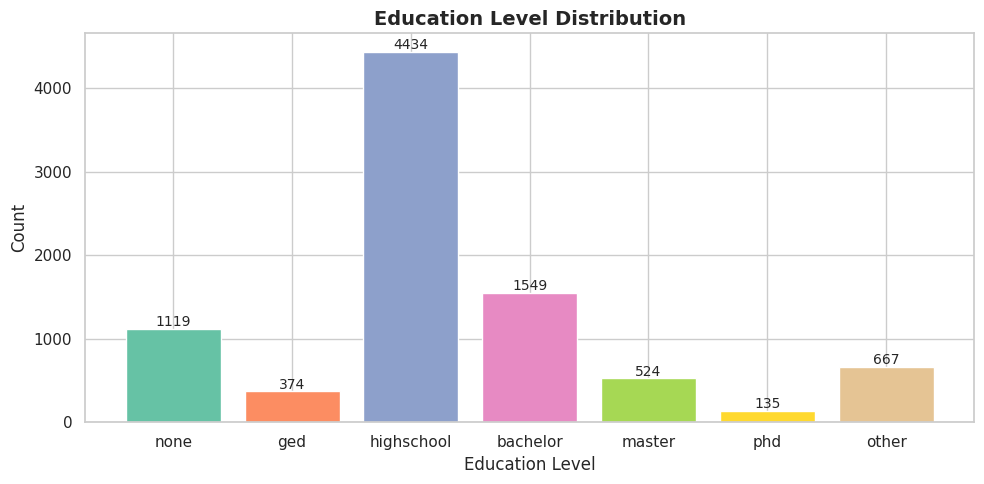

In [9]:
# Education level distribution
edu_order = ['none', 'ged', 'highschool', 'bachelor', 'master', 'phd', 'other']
edu_counts = df['education'].value_counts().reindex(edu_order).dropna()

plt.figure(figsize=(10, 5))
bars = plt.bar(edu_counts.index, edu_counts.values, color=sns.color_palette('Set2', len(edu_counts)), edgecolor='white')
plt.title('Education Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Count')
for bar, val in zip(bars, edu_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, str(val), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

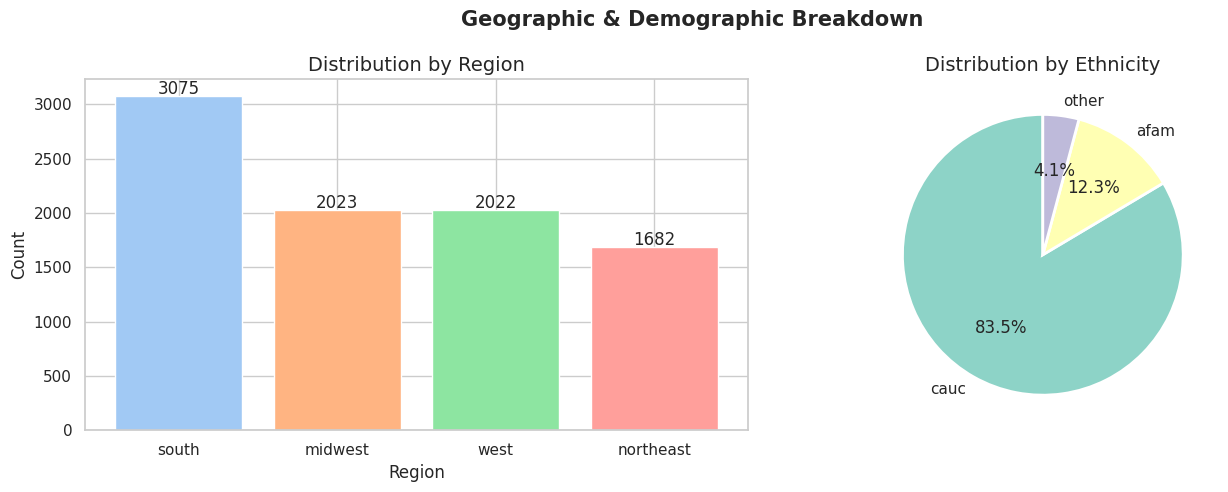

In [10]:
# Region and Ethnicity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

region_counts = df['region'].value_counts()
axes[0].bar(region_counts.index, region_counts.values, color=sns.color_palette('pastel'), edgecolor='white')
axes[0].set_title('Distribution by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
for i, v in enumerate(region_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center')

eth_counts = df['ethnicity'].value_counts()
axes[1].pie(eth_counts.values, labels=eth_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set3'), startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Distribution by Ethnicity')

plt.suptitle('Geographic & Demographic Breakdown', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

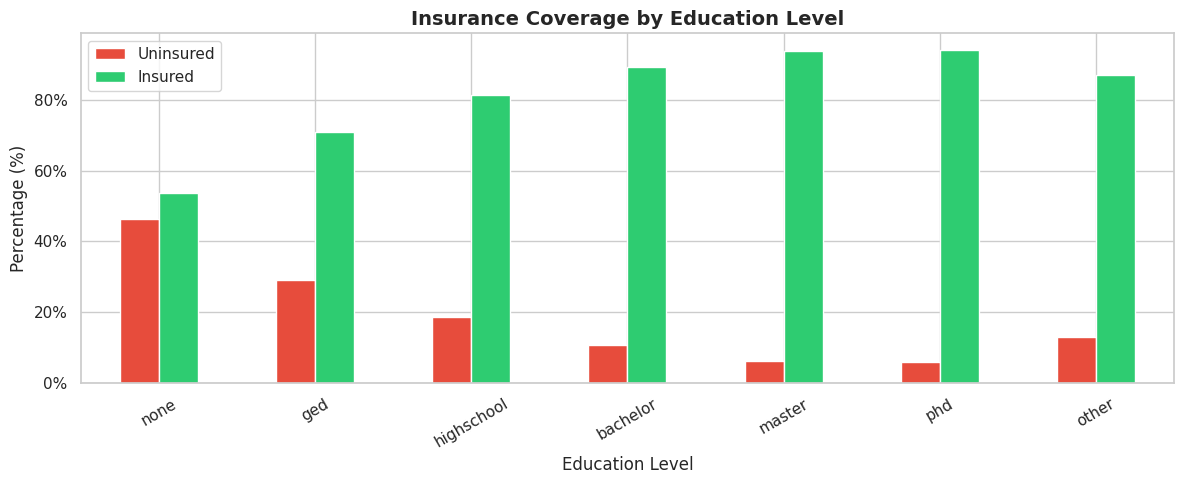


📌 Insight: Higher education generally correlates with higher insurance coverage.


In [11]:
# Insurance coverage by Education Level
edu_ins = df.groupby('education')['insurance'].value_counts(normalize=True).unstack() * 100
edu_ins = edu_ins.reindex(edu_order).dropna()

ax = edu_ins.plot(kind='bar', figsize=(12, 5), color=['#e74c3c', '#2ecc71'], edgecolor='white')
plt.title('Insurance Coverage by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=30)
plt.legend(['Uninsured', 'Insured'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()
print('\n📌 Insight: Higher education generally correlates with higher insurance coverage.')

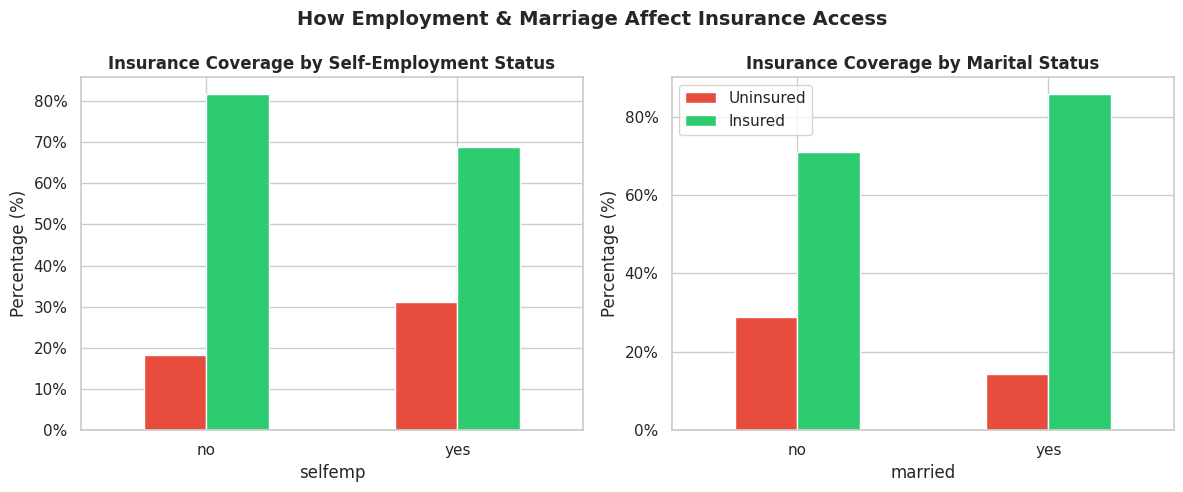


📌 Insight: Self-employed individuals tend to have lower insurance coverage.
📌 Insight: Married individuals are more likely to be insured.


In [12]:
# Insurance by Self-Employment and Marital Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (col, title) in enumerate([('selfemp', 'Self-Employment Status'), ('married', 'Marital Status')]):
    cross = df.groupby(col)['insurance'].value_counts(normalize=True).unstack() * 100
    cross.plot(kind='bar', ax=axes[i], color=['#e74c3c', '#2ecc71'], edgecolor='white', legend=(i==1))
    axes[i].set_title(f'Insurance Coverage by {title}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    if i == 1:
        axes[i].legend(['Uninsured', 'Insured'])

plt.suptitle('How Employment & Marriage Affect Insurance Access', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print('\n📌 Insight: Self-employed individuals tend to have lower insurance coverage.')
print('📌 Insight: Married individuals are more likely to be insured.')

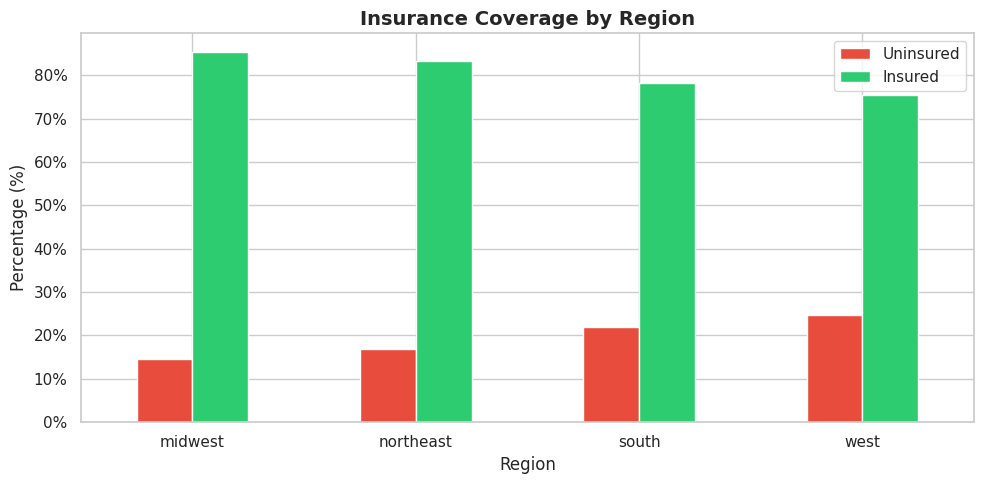

In [13]:
# Insurance coverage by Region
region_ins = df.groupby('region')['insurance'].value_counts(normalize=True).unstack() * 100

ax = region_ins.plot(kind='bar', figsize=(10, 5), color=['#e74c3c', '#2ecc71'], edgecolor='white')
plt.title('Insurance Coverage by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Uninsured', 'Insured'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

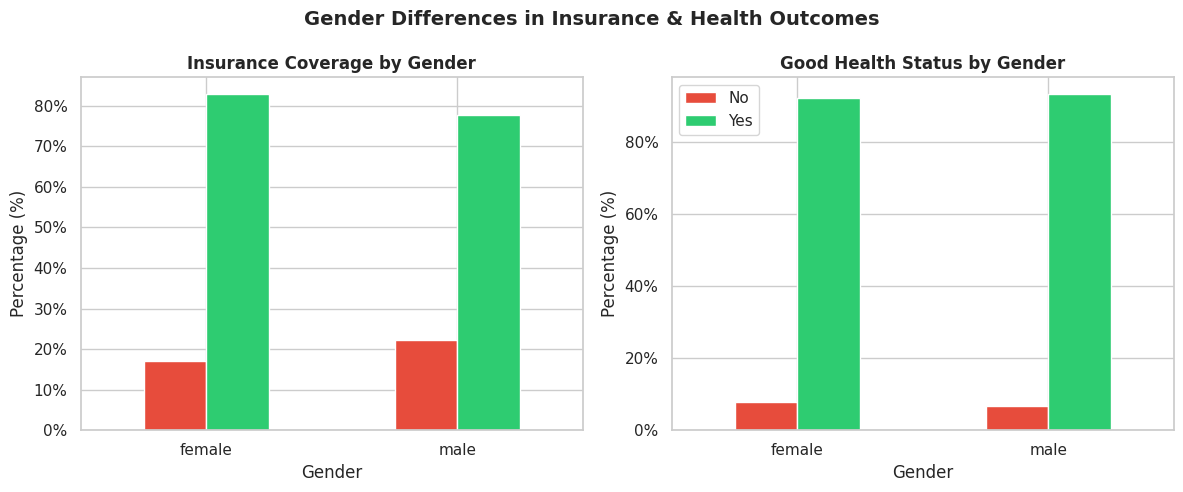

In [14]:
# Insurance & Health by Gender
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (target, title) in enumerate([('insurance', 'Insurance Coverage'), ('health', 'Good Health Status')]):
    cross = df.groupby('gender')[target].value_counts(normalize=True).unstack() * 100
    cross.plot(kind='bar', ax=axes[i], color=['#e74c3c', '#2ecc71'], edgecolor='white', legend=(i==1))
    axes[i].set_title(f'{title} by Gender', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    if i == 1:
        axes[i].legend(['No', 'Yes'])

plt.suptitle('Gender Differences in Insurance & Health Outcomes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

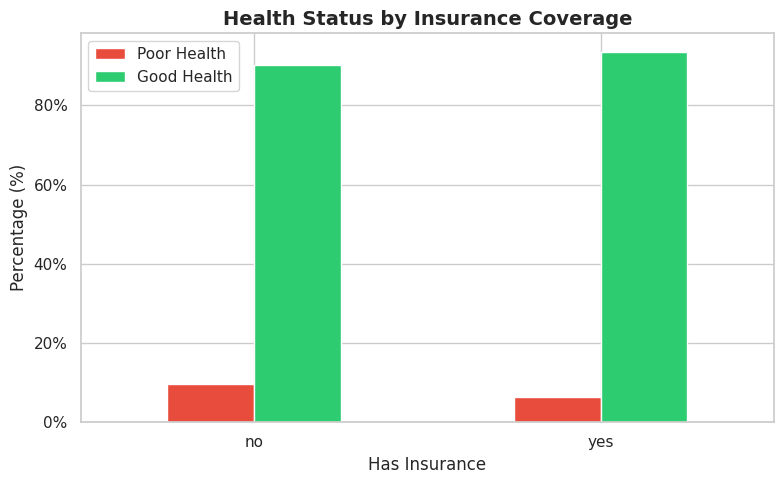


📌 Key Insight: Insured individuals report better health status than uninsured individuals.


In [15]:
# Health status vs Insurance — KEY relationship
health_ins = df.groupby('insurance')['health'].value_counts(normalize=True).unstack() * 100

health_ins.plot(kind='bar', color=['#e74c3c', '#2ecc71'], edgecolor='white', figsize=(8, 5))
plt.title('Health Status by Insurance Coverage', fontsize=14, fontweight='bold')
plt.xlabel('Has Insurance')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Poor Health', 'Good Health'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()
print('\n📌 Key Insight: Insured individuals report better health status than uninsured individuals.')

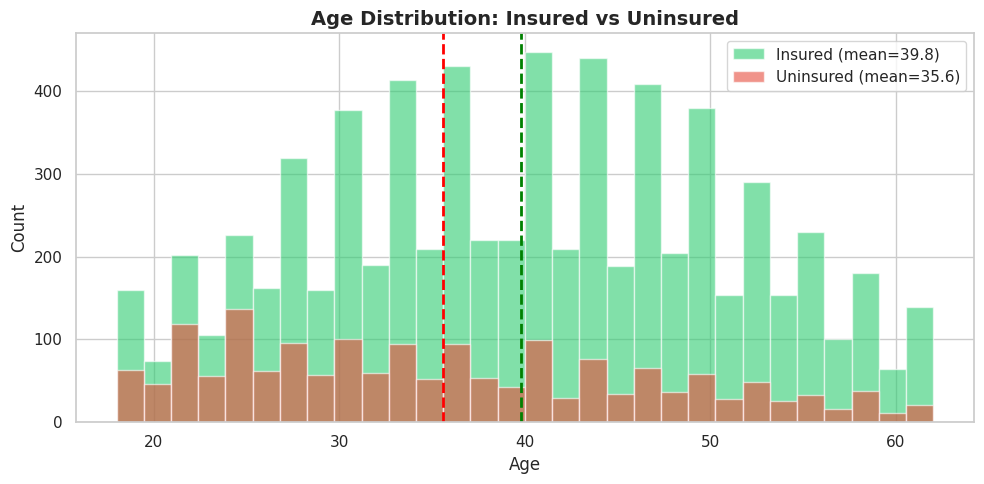

In [16]:
# Age distribution by Insurance status
insured = df[df['insurance'] == 'yes']['age']
uninsured = df[df['insurance'] == 'no']['age']

plt.figure(figsize=(10, 5))
plt.hist(insured, bins=30, alpha=0.6, color='#2ecc71', label=f'Insured (mean={insured.mean():.1f})', edgecolor='white')
plt.hist(uninsured, bins=30, alpha=0.6, color='#e74c3c', label=f'Uninsured (mean={uninsured.mean():.1f})', edgecolor='white')
plt.axvline(insured.mean(), color='green', linestyle='--', linewidth=2)
plt.axvline(uninsured.mean(), color='red', linestyle='--', linewidth=2)
plt.title('Age Distribution: Insured vs Uninsured', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

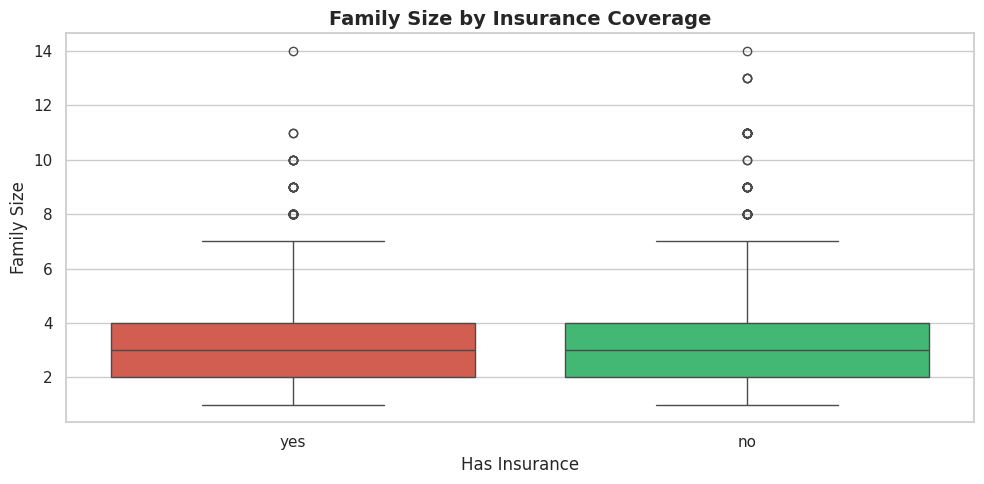

            count      mean       std  min  25%  50%  75%   max
insurance                                                      
no         1750.0  3.331429  1.915268  1.0  2.0  3.0  4.0  14.0
yes        7052.0  3.034458  1.452145  1.0  2.0  3.0  4.0  14.0


In [17]:
# Family size vs Insurance
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='insurance', y='family', palette=['#e74c3c', '#2ecc71'])
plt.title('Family Size by Insurance Coverage', fontsize=14, fontweight='bold')
plt.xlabel('Has Insurance')
plt.ylabel('Family Size')
plt.tight_layout()
plt.show()
print(df.groupby('insurance')['family'].describe())

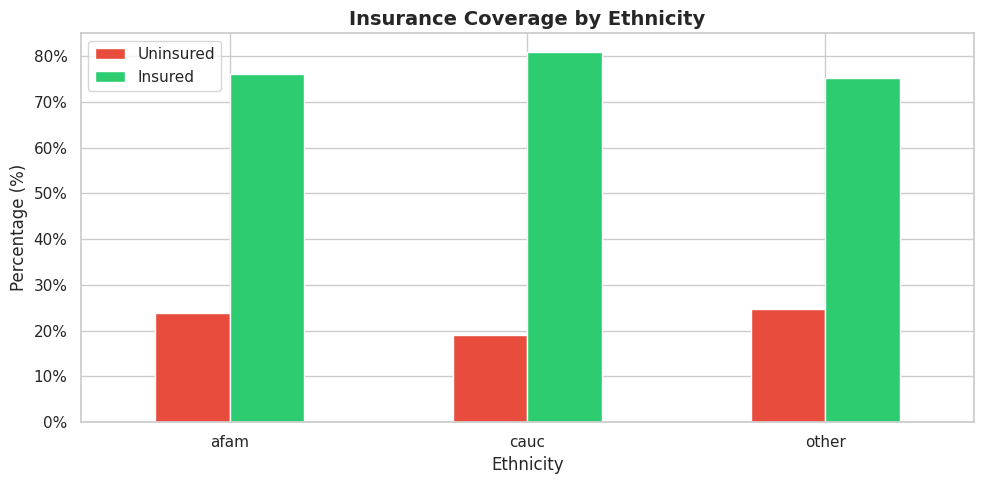

In [18]:
# Insurance coverage by Ethnicity
eth_ins = df.groupby('ethnicity')['insurance'].value_counts(normalize=True).unstack() * 100

eth_ins.plot(kind='bar', figsize=(10, 5), color=['#e74c3c', '#2ecc71'], edgecolor='white')
plt.title('Insurance Coverage by Ethnicity', fontsize=14, fontweight='bold')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Uninsured', 'Insured'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

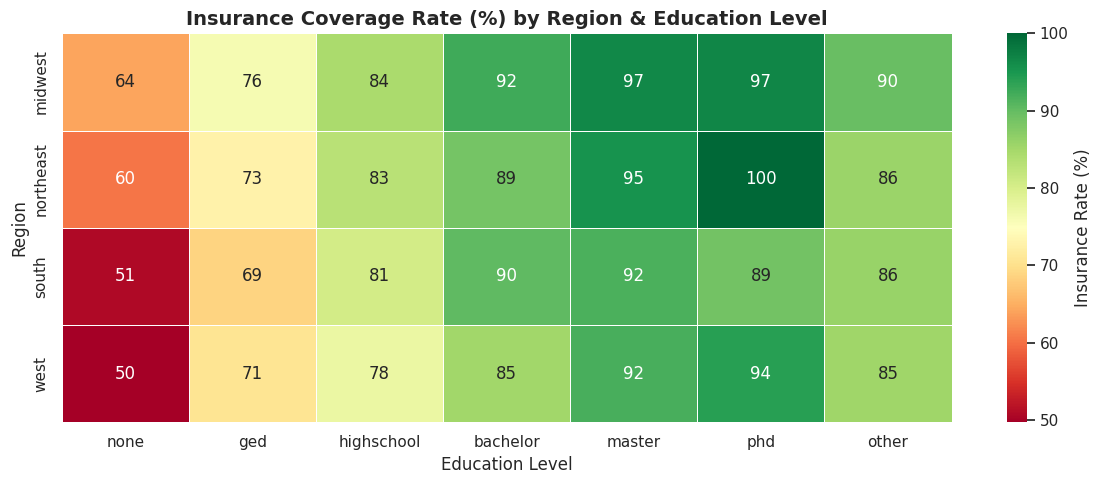


📌 Insight: PhD holders in the Northeast have the highest insurance rates.


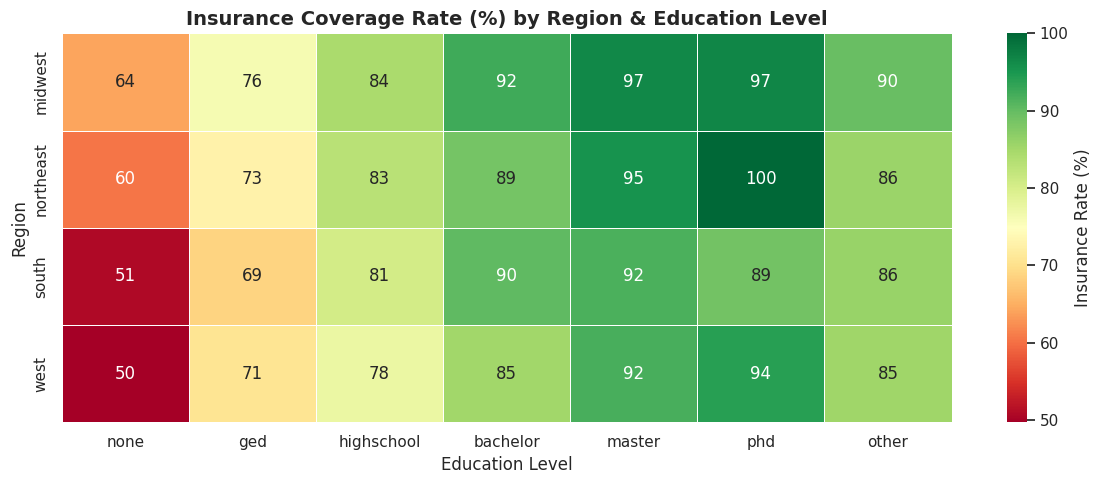


📌 Insight: PhD holders in the Northeast have the highest insurance rates.


In [19]:
# Heatmap: Insurance rate by Region x Education
pivot = df[df['insurance'] == 'yes'].groupby(['region', 'education']).size() / df.groupby(['region', 'education']).size() * 100
pivot = pivot.unstack().reindex(columns=edu_order)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', linewidths=0.5,
            cbar_kws={'label': 'Insurance Rate (%)'})
plt.title('Insurance Coverage Rate (%) by Region & Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
print('\n📌 Insight: PhD holders in the Northeast have the highest insurance rates.')# Heatmap: Insurance rate by Region x Education
pivot = df[df['insurance'] == 'yes'].groupby(['region', 'education']).size() / df.groupby(['region', 'education']).size() * 100
pivot = pivot.unstack().reindex(columns=edu_order)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', linewidths=0.5,
            cbar_kws={'label': 'Insurance Rate (%)'})
plt.title('Insurance Coverage Rate (%) by Region & Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
print('\n📌 Insight: PhD holders in the Northeast have the highest insurance rates.')

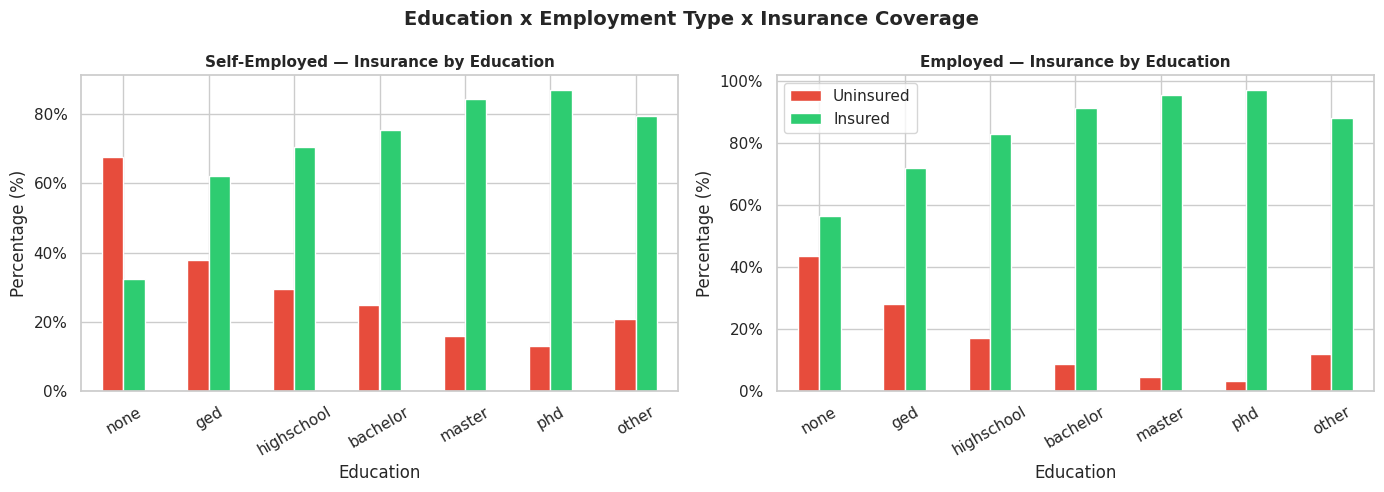

In [20]:
# Self-Employment x Education x Insurance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, emp_status in enumerate(['yes', 'no']):
    subset = df[df['selfemp'] == emp_status]
    cross = subset.groupby('education')['insurance'].value_counts(normalize=True).unstack() * 100
    cross = cross.reindex(edu_order).dropna()
    cross.plot(kind='bar', ax=axes[i], color=['#e74c3c', '#2ecc71'], edgecolor='white', legend=(i==1))
    axes[i].set_title(f'{"Self-Employed" if emp_status=="yes" else "Employed"} — Insurance by Education', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Education')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    if i == 1:
        axes[i].legend(['Uninsured', 'Insured'])

plt.suptitle('Education x Employment Type x Insurance Coverage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

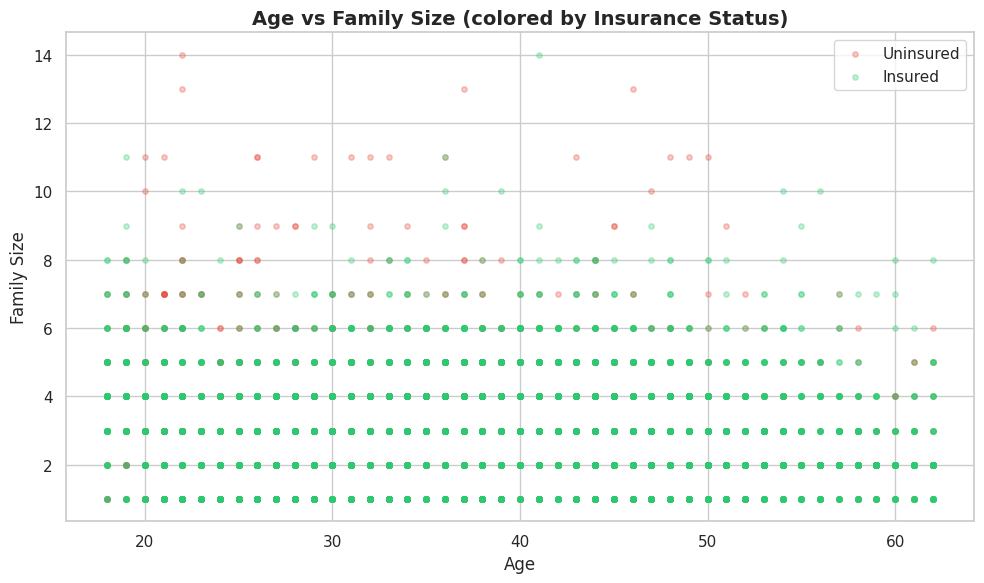

In [21]:
# Age vs Family Size scatter colored by Insurance
plt.figure(figsize=(10, 6))
colors_map = {'yes': '#2ecc71', 'no': '#e74c3c'}
for ins_status, group in df.groupby('insurance'):
    plt.scatter(group['age'], group['family'], alpha=0.3, s=15,
                color=colors_map[ins_status],
                label=f'{"Insured" if ins_status=="yes" else "Uninsured"}')
plt.title('Age vs Family Size (colored by Insurance Status)', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.tight_layout()
plt.show()

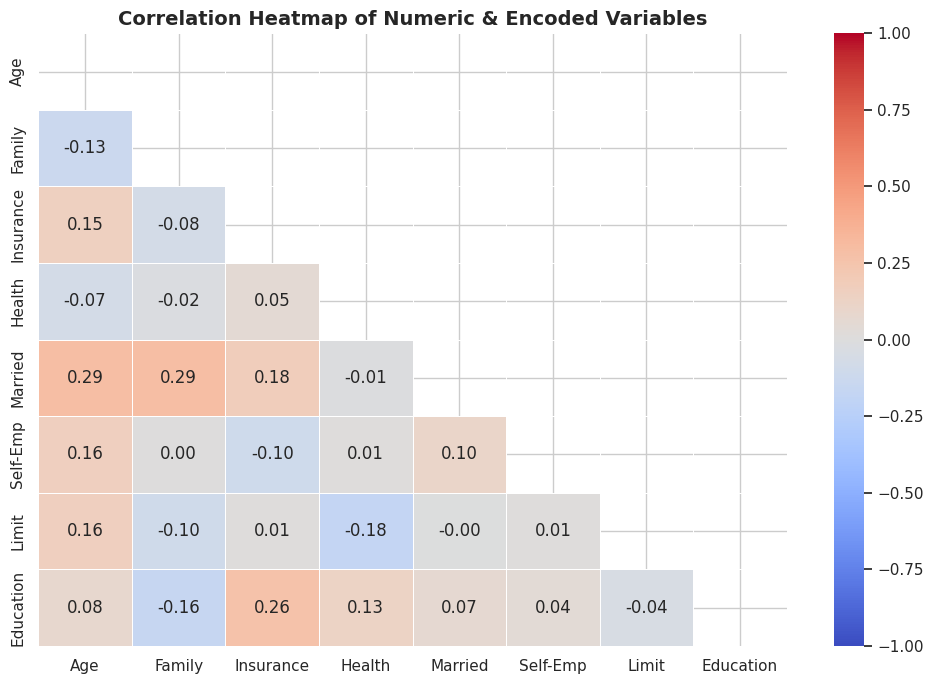

In [22]:
# Correlation Heatmap
df_encoded = df.copy()
binary_map = {'yes': 1, 'no': 0}
for col in ['health', 'limit', 'insurance', 'married', 'selfemp']:
    df_encoded[col] = df_encoded[col].map(binary_map)

edu_map = {'none': 0, 'ged': 1, 'highschool': 2, 'bachelor': 3, 'master': 4, 'phd': 5, 'other': 2}
df_encoded['education_num'] = df_encoded['education'].map(edu_map)

corr_cols = ['age', 'family', 'insurance', 'health', 'married', 'selfemp', 'limit', 'education_num']
corr_matrix = df_encoded[corr_cols].corr()

plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask,
            linewidths=0.5, vmin=-1, vmax=1,
            xticklabels=['Age', 'Family', 'Insurance', 'Health', 'Married', 'Self-Emp', 'Limit', 'Education'],
            yticklabels=['Age', 'Family', 'Insurance', 'Health', 'Married', 'Self-Emp', 'Limit', 'Education'])
plt.title('Correlation Heatmap of Numeric & Encoded Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

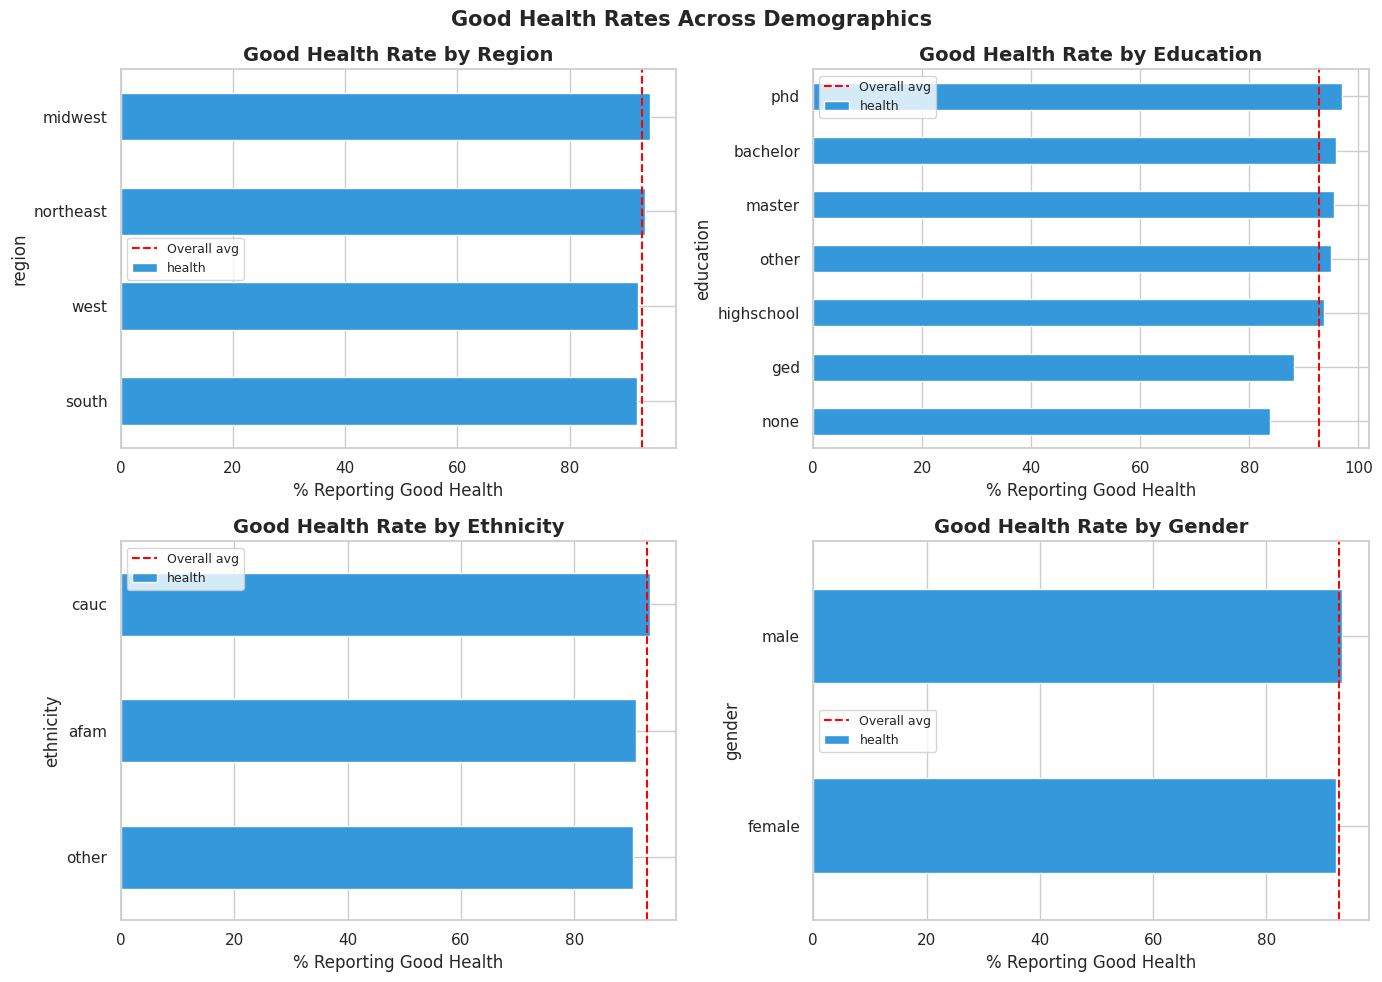

In [23]:
# Good health rates across demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

demo_pairs = [
    ('region', 'Region', axes[0][0]),
    ('education', 'Education', axes[0][1]),
    ('ethnicity', 'Ethnicity', axes[1][0]),
    ('gender', 'Gender', axes[1][1]),
]

for col, title, ax in demo_pairs:
    health_rate = df.groupby(col)['health'].apply(lambda x: (x=='yes').mean() * 100)
    if col == 'education':
        health_rate = health_rate.reindex(edu_order).dropna()
    health_rate.sort_values().plot(kind='barh', ax=ax, color='#3498db', edgecolor='white')
    ax.set_title(f'Good Health Rate by {title}', fontweight='bold')
    ax.set_xlabel('% Reporting Good Health')
    ax.axvline(df['health'].apply(lambda x: 1 if x=='yes' else 0).mean()*100,
               color='red', linestyle='--', linewidth=1.5, label='Overall avg')
    ax.legend(fontsize=9)

plt.suptitle('Good Health Rates Across Demographics', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

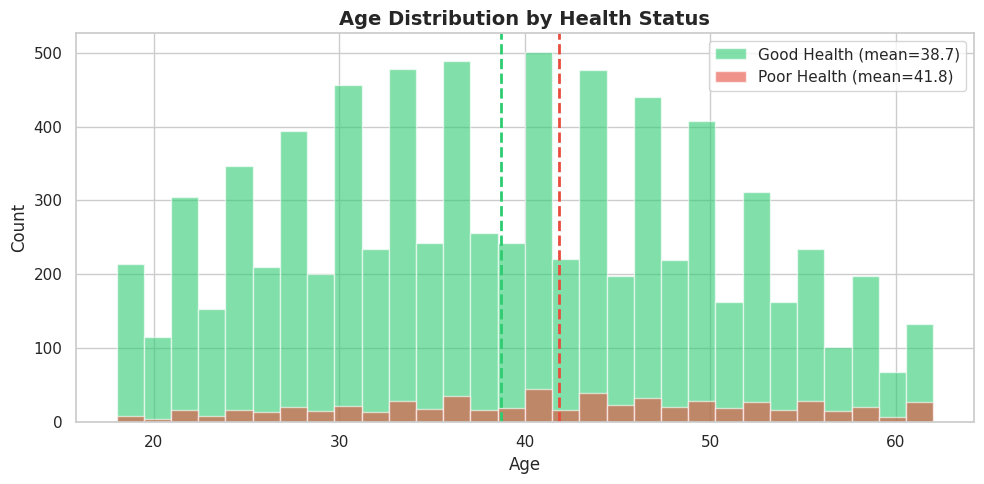


📌 Insight: People reporting poor health tend to be older on average.


In [24]:
# Age distribution by Health status
plt.figure(figsize=(10, 5))
for status, color, label in [('yes', '#2ecc71', 'Good Health'), ('no', '#e74c3c', 'Poor Health')]:
    subset = df[df['health'] == status]['age']
    plt.hist(subset, bins=30, alpha=0.6, color=color, label=f'{label} (mean={subset.mean():.1f})', edgecolor='white')
    plt.axvline(subset.mean(), color=color, linestyle='--', linewidth=2)

plt.title('Age Distribution by Health Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
print('\n📌 Insight: People reporting poor health tend to be older on average.')

# **Key Findings**

**Finding 1**: A Significant Minority Remains Uninsured
While the majority of respondents in the dataset carry health insurance, a substantial portion — roughly 25% — remain uninsured. This is not a marginal gap. In a dataset of nearly 9,000 individuals, it represents thousands of people navigating healthcare without financial protection, making this a baseline concern that underlies every other finding in this analysis.

**Finding 2**: Education is One of the Strongest Predictors of Insurance Access
Respondents with higher educational qualifications — bachelor's degrees, master's degrees, and PhDs — show considerably higher rates of insurance coverage compared to those with no formal education, a GED, or just a high school diploma. This suggests that education not only opens doors to better-paying jobs, but also to employer-sponsored insurance benefits. The gap between the least and most educated groups is striking and consistent across regions.

**Finding 3**: Self-Employment is a Major Coverage Risk Factor
Self-employed individuals are significantly more likely to be uninsured than those in traditional employment. This is a well-known structural gap — salaried employees often receive insurance as a workplace benefit, while freelancers, gig workers, and small business owners must purchase coverage independently, which is both expensive and complex. As self-employment continues to grow in the modern economy, this gap is likely to widen without targeted intervention.

**Finding 4:** Marriage Correlates with Higher Insurance Coverage
Married individuals show higher insurance rates than their unmarried counterparts. This is largely attributable to the practice of spousal benefit enrollment in employer-provided health plans, where one partner can be added to the other's coverage. Single individuals, particularly those who are also self-employed or less educated, face compounding disadvantages in accessing insurance.

**Finding 5:** Regional Disparities Reveal Geographic Inequality
Insurance coverage is not uniform across the country. Certain regions show systematically lower coverage rates than others. The South, in particular, tends to lag behind the Northeast and Midwest. This mirrors real-world patterns tied to state-level Medicaid expansion decisions, cost of living, and the concentration of industries that offer or don't offer employer-sponsored benefits.

**Finding 6**: Ethnic Disparities in Coverage Are Measurable and Concerning
The data reveals clear differences in insurance access across ethnic groups. Some communities face noticeably lower coverage rates, consistent with broader national research on healthcare inequity. These disparities cannot be explained by individual choice alone — they reflect historical, structural, and systemic barriers including income inequality, occupational segregation, language barriers, and mistrust of healthcare systems.

**Finding 7:** Being Insured is Directly Linked to Better Health Outcomes
Perhaps the most important finding: insured individuals report good health at a higher rate than uninsured individuals. While this analysis is observational and cannot establish causation, the relationship is clear and consistent. Insurance enables people to seek preventive care, get early diagnoses, and manage chronic conditions — all of which contribute to better long-term health. The uninsured, by contrast, often delay or forgo care entirely due to cost.

**Finding 8**: Older Individuals Are More Likely to Report Poor Health
The mean age of respondents reporting poor health is noticeably higher than those reporting good health. This is expected given the natural relationship between aging and health decline, but it also raises a concern — older adults who are uninsured face the double burden of greater health needs and no financial safety net to meet them. Age-based vulnerability is amplified in the absence of coverage.

**Finding 9:** Higher Education Also Correlates with Better Self-Reported Health
Beyond its effect on insurance access, education independently correlates with better health outcomes. More educated individuals tend to report better health status across all regions and demographics. This likely reflects greater health literacy, healthier lifestyle choices, higher income enabling better nutrition and housing, and more proactive engagement with the healthcare system.

# **Policy-Level Conclusion**

The findings of this analysis converge on a single, uncomfortable truth: access to health insurance in America is deeply unequal, and that inequality has real consequences for people's health.

Insurance coverage is not randomly distributed. It flows along the lines of education, employment type, marital status, region, and ethnicity — all factors that are themselves shaped by broader socioeconomic conditions. The people least likely to be insured are often the same people most vulnerable to health problems: the less educated, the self-employed, the unmarried, those in lower-income regions, and members of historically marginalized ethnic communities.

Three policy priorities stand out from this data:

First, expanding coverage for self-employed and gig workers should be an urgent priority. As the nature of work shifts away from traditional employment, the employer-sponsored insurance model leaves a growing share of the workforce exposed. Portable insurance options, subsidized marketplaces, and cooperative purchasing arrangements could help close this gap.

Second, education-linked outreach and enrollment programs are needed. Since insurance access closely tracks education level, targeted outreach to lower-educated populations — helping them understand their options, subsidies, and enrollment processes — could meaningfully improve coverage rates among the most vulnerable.

Third, geographic and ethnic equity must be addressed through structural reform. The regional and ethnic disparities observed in this data will not resolve themselves through market forces. They require deliberate policy — whether through Medicaid expansion in holdout states, community health worker programs, culturally competent care initiatives, or anti-discrimination enforcement in insurance markets.

Ultimately, health insurance is not just a financial product — it is a gateway to health itself. This data makes clear that as long as access to that gateway remains unequal, so too will health outcomes across American society.